In [14]:
import pandas as pd

In [15]:
df=pd.read_csv("/content/drive/MyDrive/Concept and Technologies of AI/Copy of bank.csv")

In [16]:
print(df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [17]:
object_columns = df.select_dtypes(include='object').columns
print(object_columns)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [18]:
unique_values = df[object_columns].nunique()
print("Unique values: \n", unique_values)

Unique values: 
 job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
y             2
dtype: int64


In [19]:
null_no = df.isnull().sum()
print("Total number of null values: \n: ", null_no)

Total number of null values: 
:  age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [20]:
dtypes_columns = df.select_dtypes(include='object').columns
new_df = df.drop(columns=dtypes_columns)
new_df.to_csv("banknumericdata.csv", index=False)
print("File created successfully!")

File created successfully!


In [21]:
df_read = pd.read_csv("banknumericdata.csv")
print(df_read.describe())

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

In [22]:
df = pd.read_csv("/content/drive/MyDrive/Concept and Technologies of AI/Titanic-Dataset.csv")

In [23]:
subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
first_class_df = subset_df[subset_df['Pclass'] == 1]
mean = first_class_df['Fare'].mean()
median = first_class_df['Fare'].median()
max = first_class_df['Fare'].max()
min = first_class_df['Fare'].min()

print("Mean Fare:", mean)
print("Median Fare:", median)
print("Maximum Fare:", max)
print("Minimum Fare:", min)


Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0


In [24]:
age_df = df["Age"]
count = age_df.isnull().sum()
count

np.int64(177)

In [25]:
embarked_encoded = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_encoded], axis=1)
df = df.drop(columns=['Embarked'])
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


In [29]:
import seaborn as sns


total_survival_rate = df.groupby('Sex')['Survived'].mean()
print("Mean of survival rates by gender:")
print(total_survival_rate)

Mean of survival rates by gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


/tmp/ipython-input-3716921749.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_survival_rate.index, y=total_survival_rate.values, palette="pastel")


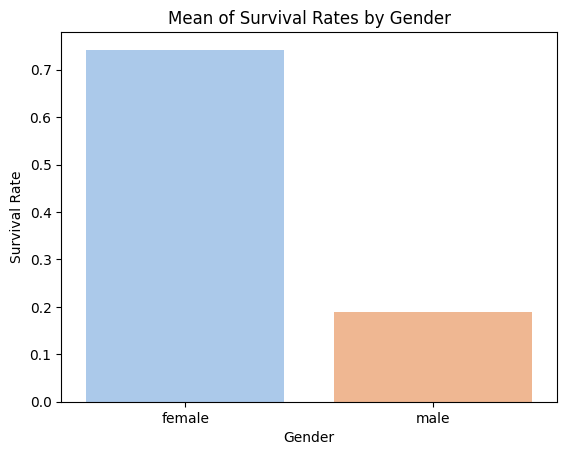

In [30]:
import matplotlib.pyplot as plt
sns.barplot(x=total_survival_rate.index, y=total_survival_rate.values, palette="pastel")
plt.title("Mean of Survival Rates by Gender")
plt.ylabel("Survival Rate")
plt.xlabel("Gender")
plt.show()

Mean of survival rates by gender and embarkation port:
      Sex Embarked  Survived
0  female        C  0.876712
1  female        Q  0.750000
2  female        S  0.689655
3    male        C  0.305263
4    male        Q  0.073171
5    male        S  0.174603


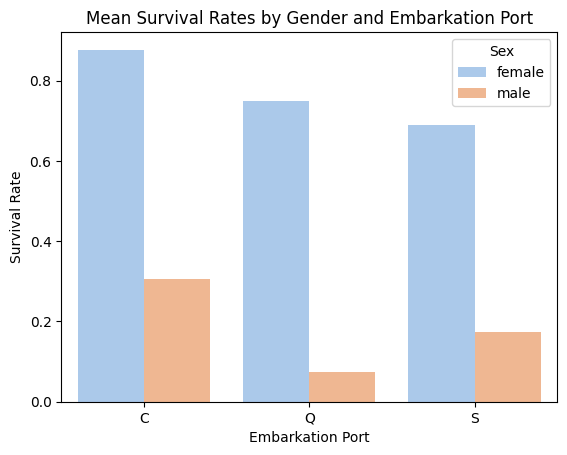

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Re-read the original dataframe to ensure 'Embarked' column is present
df = pd.read_csv("/content/drive/MyDrive/Concept and Technologies of AI/Titanic-Dataset.csv")

survival_rates = df.groupby(['Sex','Embarked'])['Survived'].mean().reset_index()
print("Mean of survival rates by gender and embarkation port:")
print(survival_rates)
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=survival_rates, palette="pastel")
plt.title("Mean Survival Rates by Gender and Embarkation Port")
plt.ylabel("Survival Rate")
plt.xlabel("Embarkation Port")
plt.show()